In [6]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from pandas.api.types import CategoricalDtype 

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [7]:
# import train.csv
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
print(df.shape)
print(df.info())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st     

In [9]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [10]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [11]:
# columns having at least one missing value
df.isnull().any()

# above is equivalent to axis=0 (by default, any() operates on columns)
df.isnull().any(axis=0)

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [12]:
# rows having all missing values
df.isnull().all(axis=1)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
1443    False
1444    False
1445    False
1446    False
1447    False
1448    False
1449    False
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [13]:
# sum it up to check how many rows have all missing values
df.isnull().all(axis=1).sum()

0

In [14]:
# sum of misisng values in each row
df.isnull().sum(axis=1)

0        5
1        4
2        4
3        4
4        4
5        3
6        4
7        4
8        4
9        4
10       5
11       4
12       6
13       4
14       4
15       4
16       4
17       9
18       5
19       4
20       4
21       2
22       4
23       4
24       4
25       4
26       5
27       4
28       4
29       5
        ..
1430     4
1431     6
1432     4
1433     4
1434     4
1435     3
1436     4
1437     4
1438     4
1439     4
1440     4
1441     5
1442     4
1443     5
1444     5
1445     5
1446     6
1447     4
1448     4
1449    10
1450    10
1451     4
1452     5
1453    10
1454     4
1455     4
1456     3
1457     2
1458     5
1459     5
Length: 1460, dtype: int64

We have now identified:
- The number of missing values in columns
- The number of missing values in rows

Let's now move ahead and treat the missing values.

### Treating missing Values in Columns

In [15]:
# summing up the missing values (column-wise)
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [16]:
# removing the three columns
df = df.drop('PoolQC', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('MiscFeature', axis=1)

round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars 

In [17]:
df = df.drop('Fence', axis=1)

In [18]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinis

In [19]:
### Treating missing values in rows
df[df.isnull().sum(axis=1) > 5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,...,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,...,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,123600
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,7,2006,WD,Normal,109900
99,100,20,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,400,1,2010,WD,Normal,128950
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,...,0,0,0,0,0,6,2009,WD,Alloca,118964
108,109,50,RM,85.0,8500,Pave,Reg,Lvl,AllPub,Corner,...,144,0,0,0,0,8,2007,WD,Normal,115000


In [20]:
# count the number of rows having > 5 missing values
# use len(df.index)
len(df[df.isnull().sum(axis=1) > 5].index)

98

In [21]:
# 98 rows have more than 5 missing values
# calculate the percentage
100*(len(df[df.isnull().sum(axis=1) > 5].index) / len(df.index))

6.712328767123288

Thus, about 7% rows have more than 5 missing values. Let's remove these rows and count the number of missing values remaining.

In [22]:
# retaining the rows having <= 5 NaNs
df = df[df.isnull().sum(axis=1) <= 5]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      18.06
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.59
MasVnrArea        0.59
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.44
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      43.76
GarageType        0.51
GarageYrBlt       0.51
GarageFinis

Now, we have FireplaceQu and LotFrontage as the only variable having a significant number of missing values. Let's give this variable a chance and consider imputing the NaNs.

The decision (whether and how to impute) will depend upon the distribution of the variable. For e.g., if the variable is such that all the observations lie in a short range (say between 800 sq. ft to 820 sq.ft), you can take a call to impute the missing values by something like the mean or median FireplaceQu or LotFrontage.

Let's look at the distribution.

In [23]:
df['FireplaceQu'].describe()

count     766
unique      5
top        Gd
freq      378
Name: FireplaceQu, dtype: object

In [24]:
df['LotFrontage'].describe()

count    1116.000000
mean       70.730287
std        24.519450
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Notice the minimum is 21 and max is 313. There is some variance, the mean is about 70, for a count of 1116. 

In [25]:
# removing NaNs in Landsize
df = df[~np.isnan(df['LotFrontage'])]

round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage       0.00
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.54
MasVnrArea        0.54
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.54
                 ...  
BsmtHalfBath      0.00
FullBath          0.00
HalfBath          0.00
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      46.24
GarageType        0.63
GarageYrBlt       0.63
GarageFinis

In [26]:
print(df['FireplaceQu'].dtype)

object


In [27]:
print(df['FireplaceQu'])

0       NaN
1        TA
2        TA
3        Gd
4        TA
5       NaN
6        Gd
8        TA
9        TA
10      NaN
11       Gd
13       Gd
15      NaN
18      NaN
19      NaN
20       Gd
21       Gd
22       Gd
23       TA
25       Gd
26      NaN
27       Gd
28       Gd
29      NaN
30      NaN
32      NaN
33       Gd
34       Gd
35       Gd
36      NaN
       ... 
1420     TA
1421     Fa
1422    NaN
1425    NaN
1426     TA
1427     TA
1428     Gd
1430     Gd
1432    NaN
1433     TA
1434     Gd
1435     Gd
1436    NaN
1437     Gd
1438    NaN
1439     TA
1440     Gd
1442     Ex
1444    NaN
1445    NaN
1447     TA
1448    NaN
1451     Gd
1452    NaN
1454    NaN
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1116, dtype: object


In [28]:
df["FireplaceQu"].fillna('No', inplace=True)

In [29]:
print(df['FireplaceQu'])

0       No
1       TA
2       TA
3       Gd
4       TA
5       No
6       Gd
8       TA
9       TA
10      No
11      Gd
13      Gd
15      No
18      No
19      No
20      Gd
21      Gd
22      Gd
23      TA
25      Gd
26      No
27      Gd
28      Gd
29      No
30      No
32      No
33      Gd
34      Gd
35      Gd
36      No
        ..
1420    TA
1421    Fa
1422    No
1425    No
1426    TA
1427    TA
1428    Gd
1430    Gd
1432    No
1433    TA
1434    Gd
1435    Gd
1436    No
1437    Gd
1438    No
1439    TA
1440    Gd
1442    Ex
1444    No
1445    No
1447    TA
1448    No
1451    Gd
1452    No
1454    No
1455    TA
1456    TA
1457    Gd
1458    No
1459    No
Name: FireplaceQu, Length: 1116, dtype: object


In [30]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.54
MasVnrArea       0.54
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.54
                 ... 
BsmtHalfBath     0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
KitchenQual      0.00
TotRmsAbvGrd     0.00
Functional       0.00
Fireplaces       0.00
FireplaceQu      0.00
GarageType       0.63
GarageYrBlt      0.63
GarageFinish     0.63
GarageCars       0.00
GarageArea

In [31]:
df.shape

(1116, 77)

In [32]:
# fraction of rows lost
len(df.index)/1116

1.0

Thus, we have lost about 1% observations in cleaning the missing values. 

In [33]:
#separate variables into new data frames
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])


In [34]:
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))


There are 38 numeric and 39 categorical columns in train data


In [35]:
del numeric_data['Id']

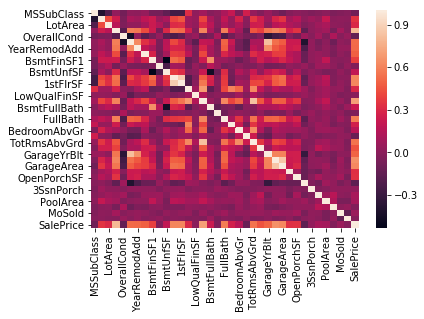

In [36]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [37]:
print (corr['SalePrice'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

SalePrice       1.000000
OverallQual     0.797021
GrLivArea       0.703793
GarageCars      0.650597
GarageArea      0.621284
TotalBsmtSF     0.615299
1stFlrSF        0.615142
FullBath        0.575154
TotRmsAbvGrd    0.550531
YearBuilt       0.524760
YearRemodAdd    0.516393
GarageYrBlt     0.502143
MasVnrArea      0.485876
Fireplaces      0.446901
BsmtFinSF1      0.386002
Name: SalePrice, dtype: float64 

----------------------
BsmtHalfBath    -0.039907
MSSubClass      -0.089675
KitchenAbvGr    -0.114497
OverallCond     -0.136223
EnclosedPorch   -0.158706
Name: SalePrice, dtype: float64


Here we see that the OverallQual feature is 79% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house. In addition, GrLivArea is 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc.
Let's check the OverallQual variable in detail.

In [38]:
#let's check the mean price per quality and plot it.
pivot = df.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)


In [39]:
pivot.sort_values

<bound method DataFrame.sort_values of              SalePrice
OverallQual           
2                60000
3               100000
4               109900
5               132500
6               157900
7               200000
8               270000
9               347500
10              426000>

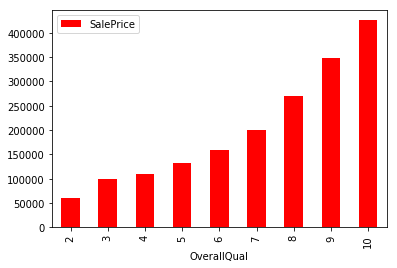

In [40]:
pivot.plot(kind='bar', color='red')

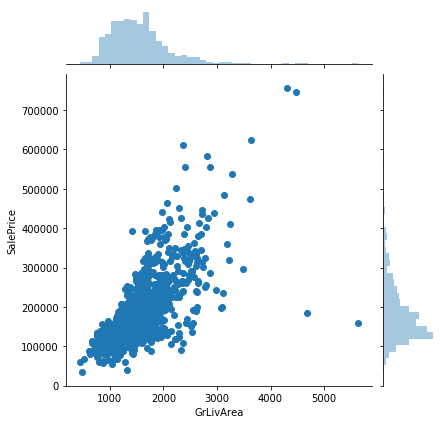

In [41]:
#GrLivArea variable
sns.jointplot(x=df['GrLivArea'], y=df['SalePrice'])

In [42]:
cat_data.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,...,1116,1116,1116,1109,1109,1109,1109,1116,1116,1116
unique,5,2,4,4,1,5,3,25,9,6,...,4,6,6,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,No,Attchd,Unf,TA,TA,Y,WD,Normal
freq,864,1112,777,1011,1116,849,1067,175,968,1104,...,538,1041,516,690,488,1046,1065,1042,944,899


Let's check the median sale price of a house based on its SaleCondition. SaleCondition explains the condition of sale. Not much information is given about its categories.

In [43]:
sp_pivot = df.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
sp_pivot

,SalePrice
SaleCondition,
Abnorml,129950
AdjLand,126000
Alloca,131148
Family,140500
Normal,160000
Partial,247453


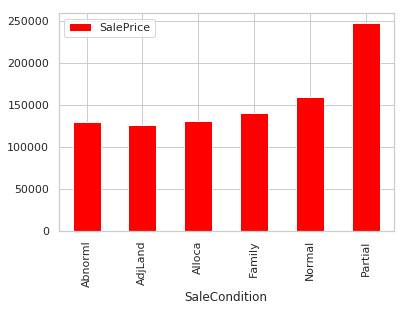

In [62]:
sp_pivot.plot(kind='bar',color='red')

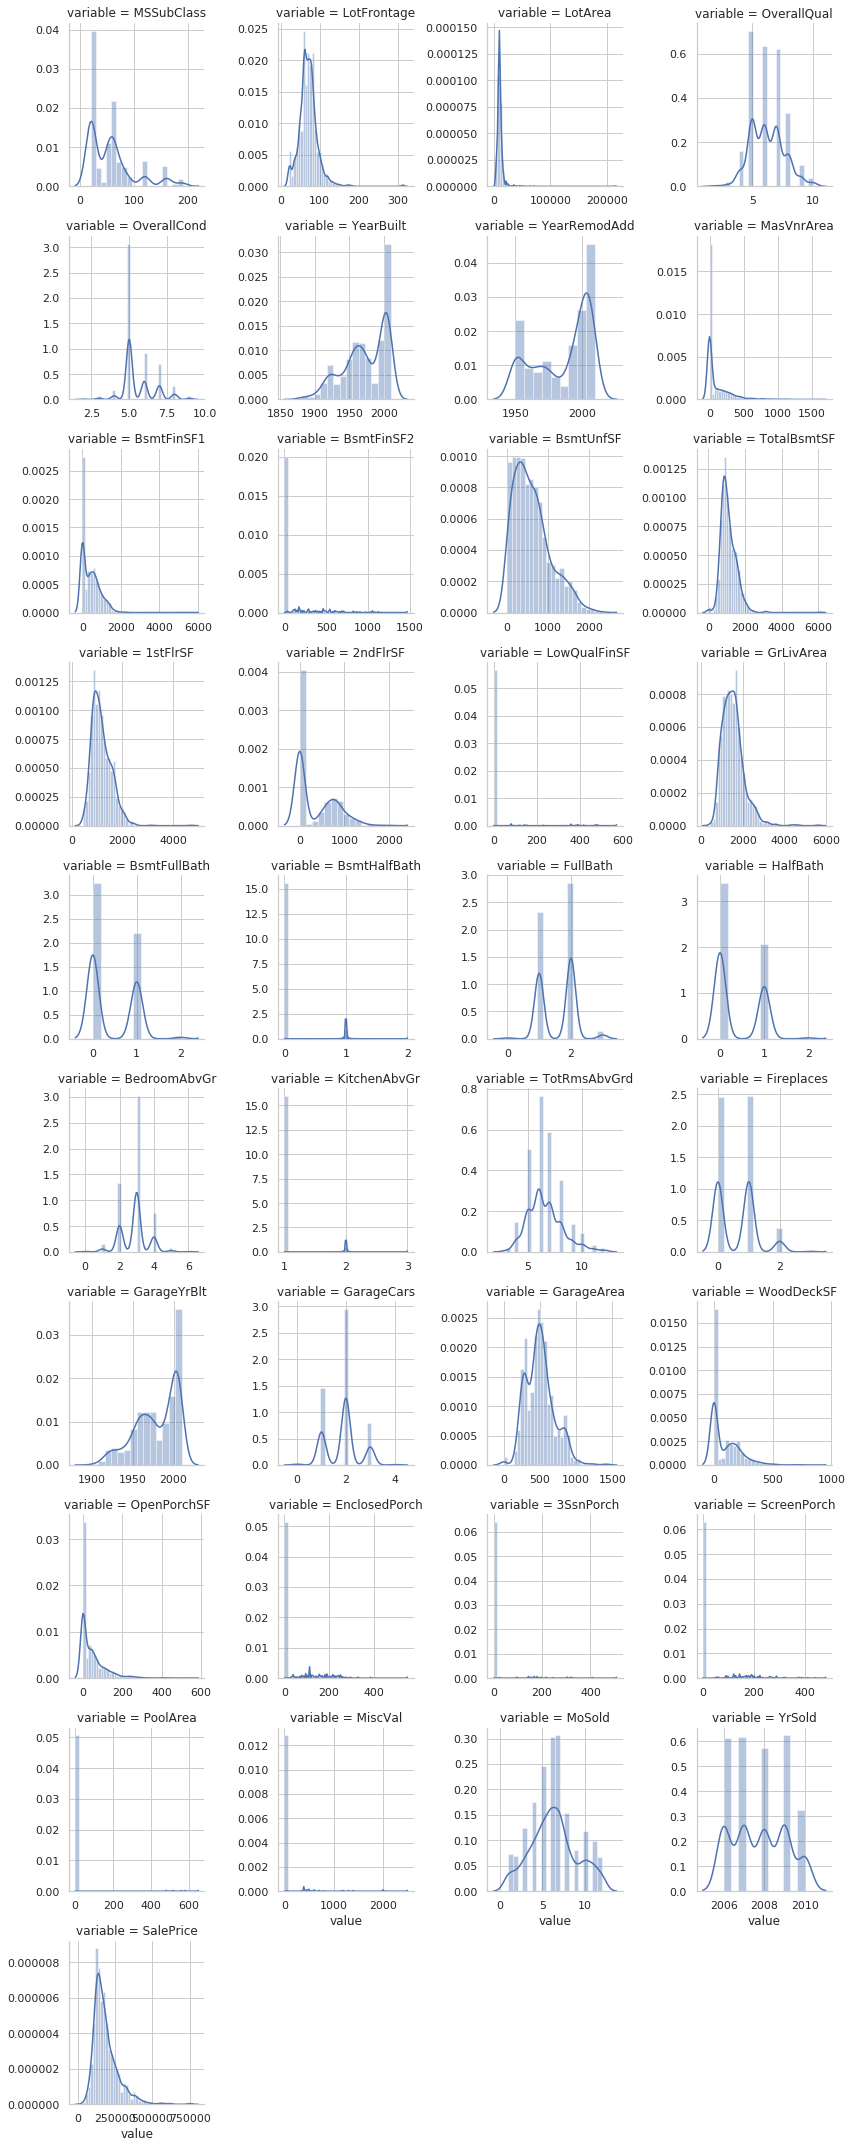

In [63]:
#create numeric plots
num = [f for f in df.columns if df.dtypes[f] != 'object']
num.remove('Id')
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

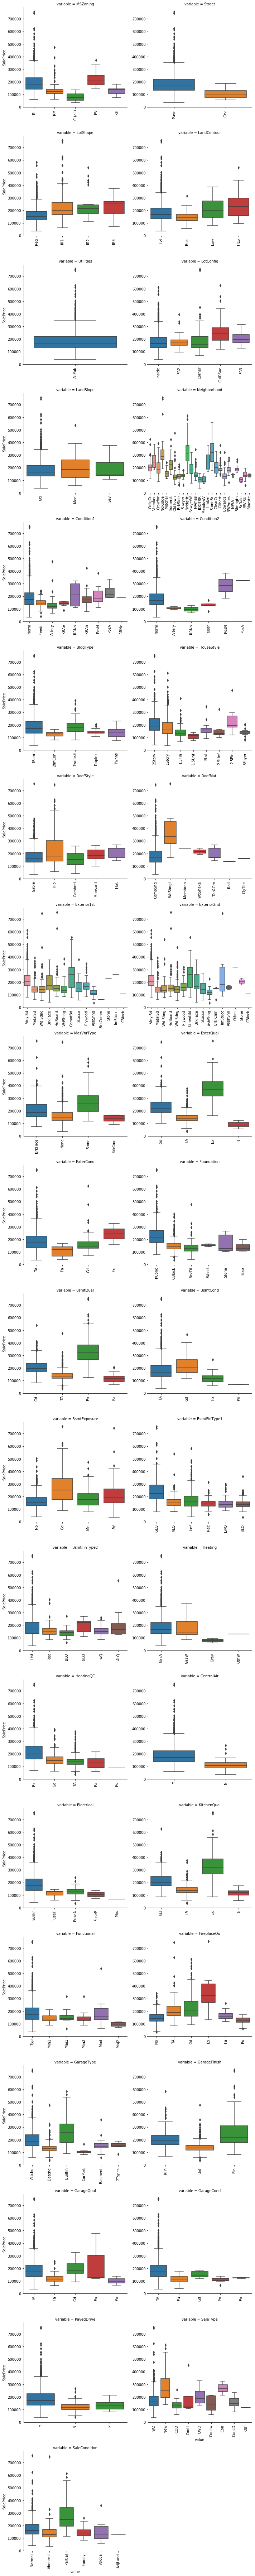

In [44]:
#creating box plot to check for outliers
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in df.columns if df.dtypes[f] == 'object']

p = pd.melt(df, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

In [46]:
#removing outliers
df.drop(df[df['GrLivArea'] > 4000].index, inplace=True)
df.shape #removed 4 rows`

(1112, 77)

In [48]:
#imputing using mode
df.loc[666, 'GarageQual'] = "TA" #stats.mode(test['GarageQual']).mode
df.loc[666, 'GarageCond'] = "TA" #stats.mode(test['GarageCond']).mode
df.loc[666, 'GarageFinish'] = "Unf" #stats.mode(test['GarageFinish']).mode
df.loc[666, 'GarageYrBlt'] = "1980" #np.nanmedian(test['GarageYrBlt'])` 

In [49]:
#mark as missing
df.loc[1116, 'GarageType'] = np.nan

In [51]:
#impute lotfrontage by median of neighborhood
lot_frontage_by_neighborhood = df['LotFrontage'].groupby(df['Neighborhood'])

for key, group in lot_frontage_by_neighborhood:
                idx = (df['Neighborhood'] == key) & (df['LotFrontage'].isnull())
                df.loc[idx, 'LotFrontage'] = group.median()

In [69]:
#imputing missing values
df["MasVnrArea"].fillna(0, inplace=True)
df["BsmtFinSF1"].fillna(0, inplace=True)
df["BsmtFinSF2"].fillna(0, inplace=True)
df["BsmtUnfSF"].fillna(0, inplace=True)
df["TotalBsmtSF"].fillna(0, inplace=True)
df["GarageArea"].fillna(0, inplace=True)
df["BsmtFullBath"].fillna(0, inplace=True)
df["BsmtHalfBath"].fillna(0, inplace=True)
df["GarageCars"].fillna(0, inplace=True)
df["GarageYrBlt"].fillna(0.0, inplace=True)
df["PoolArea"].fillna(0, inplace=True)

In [70]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,IR1,Lvl,AllPub,Corner,...,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,IR1,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,WD,Normal,250000.0


In [71]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id               0.18
MSSubClass       0.18
MSZoning         0.18
LotFrontage      0.18
LotArea          0.18
Street           0.18
LotShape         0.18
LandContour      0.18
Utilities        0.18
LotConfig        0.18
LandSlope        0.18
Neighborhood     0.18
Condition1       0.18
Condition2       0.18
BldgType         0.18
HouseStyle       0.18
OverallQual      0.18
OverallCond      0.18
YearBuilt        0.18
YearRemodAdd     0.18
RoofStyle        0.18
RoofMatl         0.18
Exterior1st      0.18
Exterior2nd      0.18
MasVnrType       0.72
MasVnrArea       0.00
ExterQual        0.18
ExterCond        0.18
Foundation       0.18
BsmtQual         0.72
                 ... 
BsmtHalfBath     0.00
FullBath         0.18
HalfBath         0.18
BedroomAbvGr     0.18
KitchenAbvGr     0.18
KitchenQual      0.18
TotRmsAbvGrd     0.18
Functional       0.18
Fireplaces       0.18
FireplaceQu      0.18
GarageType       0.81
GarageYrBlt      0.00
GarageFinish     0.72
GarageCars       0.00
GarageArea

In [67]:
# filter only area and price
df1 = df.loc[:, ['LotArea', 'SalePrice']]
df1.head()

,LotArea,SalePrice
0,8450.0,208500.0
1,9600.0,181500.0
2,11250.0,223500.0
3,9550.0,140000.0
4,14260.0,250000.0


In [68]:
df1.isnull().values.any()

True

NameError: name 'df1' is not defined

In [124]:
# visualise area-Saleprice relationship
sns.regplot(x="LotArea", y="SalePrice", data=df1, fit_reg=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [105]:
# 